<a href="https://colab.research.google.com/github/CSpanias/deep_learning/blob/main/ch3_5_FirstStepsWithTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.5 First Steps with TensorFlow

As you saw in the previous chapters, training a NN revolves around the following concepts:

1. First, **low-level tensor manipulation**—the infrastructure that underlies all modern ML. This translates to **TensorFlow APIs**:
  * **Tensors**, including special tensors that store the network’s state (variables)
  * **Tensor operations** such as addition, relu, matmul
  * **Backpropagation**, a way to compute the gradient of mathematical expressions (handled in TensorFlow via the `GradientTape` object)

2. Second, **high-level DL concepts**. This translates to **Keras APIs**:
  * **Layers**, which are combined into a model
  * A **loss function**, which defines the feedback signal used for learning
  * An **optimizer**, which determines how learning proceeds
  * **Metrics** to evaluate model performance
  * A **training loop** that performs **mini-batch stochastic gradient descent**

## 3.5.1 Constant tensors and variables

To do anything in TensorFlow, we’re going to need some **tensors**. 

Tensors need to be created with some **initial value**. For instance, you could create **all-ones** or **all-zeros tensors**, or **tensors of values drawn from a random distribution** .

In [17]:
import tensorflow as tf

# tensors initialized with 1s
x = tf.ones(shape=(2, 1)) # equivalent to np.ones(shape(2, 1))

print(f"Tensor x has {x.ndim} dims.\n")
print(x)

Tensor x has 2 dims.

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [18]:
# tensors initialized with 0s
x = tf.zeros(shape=(2, 1)) # equivalent to np.zeros(shape=(2, 1))

print(f"Tensor x has {x.ndim} dims.\n")
print(x)

Tensor x has 2 dims.

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Tensor of random values drawn from a __normal distribution__ ($μ = 0$, $σ = 1$).

In [19]:
# random initialization of tensors
x = tf.random.normal(shape=(3, 1), mean=0, stddev=1.) # equivalent to np.random.normal(size=(3, 1), loc=0., scale=1.)

print(f"Tensor x has {x.ndim} dims.\n")
print(x)

Tensor x has 2 dims.

tf.Tensor(
[[-1.3841139 ]
 [ 0.73798555]
 [-0.74983734]], shape=(3, 1), dtype=float32)


Tensor of random values drawn from a __uniform distribution__ between 0 and 1.

In [20]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.) # equivalent to np.random.uniform(size=(3, 1), low=0., high=1.)

print(f"Tensor x has {x.ndim} dims.\n")
print(x)

Tensor x has 2 dims.

tf.Tensor(
[[0.53837156]
 [0.40019417]
 [0.7715529 ]], shape=(3, 1), dtype=float32)


A significant difference between NumPy arrays and TensorFlow tensors is that __TensorFlow tensors aren’t assignable: they’re constant__. 

For instance, in NumPy, you can do the following.

In [24]:
import numpy as np

x = np.ones(shape=(2, 2))

print(f"Array x has {x.ndim} dims.\n")
print(x, "\n")

# overwrite element
x[0, 0] = 0

print(x)

Array x has 2 dims.

[[1. 1.]
 [1. 1.]] 

[[0. 1.]
 [1. 1.]]


Try to do the same thing in TensorFlow, and you will get an error: “EagerTensor object does not support item assignment.”

In [26]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0

TypeError: ignored

To train a model, we’ll need to update its state, which is a set of tensors. If tensors aren’t assignable, how do we do it? 

That’s where variables come in. `tf.Variable` is the class meant to manage modifiable state in TensorFlow.

To create a variable, you need to provide some initial value, such as a random tensor.

In [27]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.28110006],
       [-1.0978961 ],
       [ 0.68075913]], dtype=float32)>


The state of a variable can be modified via its `assign` method.

In [28]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

It also works for a subset of the coefficients.

In [29]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

Similarly, `assign_add()` and `assign_sub()` are efficient equivalents of `+=` and `-=`.

In [30]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

## 3.5.2 Tensor operations: Doing math in TensorFlow

Just like NumPy, TensorFlow offers a large collection of tensor operations to express mathematical formulas.

In [33]:
a = tf.random.normal(shape=(2, 2))
print(a)

b = tf.square(a)
print(b)

c = tf.sqrt(a)
print(c)

d = b + c
print(d)

e = tf.matmul(a, b) # dot product
print(e)

e *= d
print(e)

tf.Tensor(
[[0.8383165  0.71445537]
 [0.38218418 0.6353349 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.7027745  0.5104465 ]
 [0.14606474 0.40365043]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.9155962  0.84525466]
 [0.6182105  0.79707897]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1.6183708  1.3557012 ]
 [0.76427525 1.2007294 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.6935043  0.7163059 ]
 [0.36138934 0.4515378 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1.122347   0.9710968 ]
 [0.27620092 0.5421747 ]], shape=(2, 2), dtype=float32)


Importantly, each of the preceding operations gets executed on the fly: at any point, you can print what the current result is, just like in NumPy. We call this __eager execution__.

## 3.5.3 A second look at the GradientTape API

So far, TensorFlow seems to look a lot like NumPy. But here’s something NumPy can’t do: __retrieve the gradient of any differentiable expression__ with respect to any of its inputs. 

Just open a `GradientTape` scope, apply some computation to one or several input tensors, and retrieve the gradient of the result with respect to the inputs.

In [36]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape: 
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


This is most commonly used to retrieve the gradients of the loss of a model with respect to its weights: `gradients = tape.gradient(loss, weights)`.

So far, you’ve only seen the case where the input tensors in `tape.gradient()` were TensorFlow variables. It’s actually possible for these inputs to be any arbitrary tensor. However, only trainable variables are tracked by default. With a constant tensor, you’d have to manually mark it as being tracked by calling `tape.watch()` on it.

In [38]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


Why is this necessary? Because it would be too expensive to preemptively store the information required to compute the gradient of anything with respect to anything. To avoid wasting resources, the tape needs to know what to watch. Trainable variables are watched by default because computing the gradient of a loss with regard to a list of trainable variables is the most common use of the gradient tape.

The gradient tape is a powerful utility, even capable of computing second-order gradients, that is to say, the gradient of a gradient. For instance, the gradient of the position of an object with regard to time is the speed of that object, and the second-order gradient is its acceleration.

If you measure the position of a falling apple along a vertical axis over time and find that it verifies `position(time) = 4.9 * time ** 2`, what is its acceleration? Let’s use two nested gradient tapes to find out.

In [41]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


## 3.5.4 An end-to-end example: A linear classifier in pure TensorFlow

You know about tensors, variables, and tensor operations, and you know how to compute gradients. That’s enough to build any ML model based on gradient descent.

In a ML job interview, you may be asked to implement a __linear classifier from scratch in TensorFlow__: a very simple task that serves as a filter between candidates who have some minimal ML background and those who don’t. Let’s get you past that filter and use your newfound knowledge of TensorFlow to implement such a linear classifier.

First, let’s come up with some nicely linearly separable synthetic data to work with: __two classes of points in a 2D plane__. 

We’ll generate each class of points by drawing their __coordinates from a random distribution__ with a specific covariance matrix and a specific mean.

Intuitively, the __covariance matrix describes the shape of the point cloud__, and the __mean describes its position in the plane__. 

We’ll reuse the same covariance matrix for both point clouds, but we’ll use two different mean values—the point clouds will have the same shape, but different positions.

In [43]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

In the preceding code, `negative_samples` and `positive_samples` are both arrays with shape `(1000, 2)`. Let’s stack them into a single array with shape `(2000, 2)`.

In [45]:
print(negative_samples.shape, positive_samples.shape)

(1000, 2) (1000, 2)


In [48]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

Let’s generate the corresponding target labels, an array of zeros and ones of shape `(2000, 1)`, where `targets[i, 0]` is `0` if `inputs[i]` belongs to class `0` (and inversely).

In [49]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
print(targets.shape)

(2000, 1)


Next, let’s plot our data with Matplotlib.

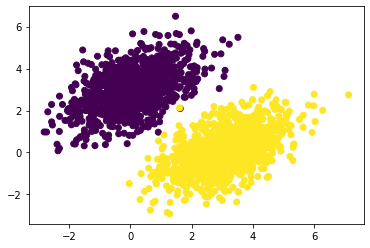

In [50]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Now let’s create a linear classifier that can learn to separate these two blobs. __A linear classifier is an affine transformation__ (`prediction = W • input + b`) trained to minimize the square of the difference between predictions and the targets.

Let’s create our variables, `W` and `b`, initialized with random values and with zeros, respectively.

In [51]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

Here’s our __forward pass__ function.

In [52]:
def model(inputs):
  return tf.matmul(inputs, W) + b

Because our linear classifier operates on 2D inputs, `W` is really just two scalar coefficients, `w1` and `w2`: `W = [[w1], [w2]]`.

Meanwhile, `b` is a single scalar coefficient. As such, for a given input point `[x, y]`, its prediction value is `prediction = [[w1], [w2]] • [x, y] + b = w1 * x + w2 * y + b`.

The following listing shows our loss function.

In [53]:
def square_loss(targets, predictions):
  # a tensor with the same shape as targets and predictions, containing per-sample loss scores.
  per_sample_losses = tf.square(targets - predictions)
  # we need to average these per-sample loss scores into a single scalar loss value
  return tf.reduce_mean(per_sample_losses)

Next is the __training step__, which receives some training data and updates the weights `W` and `b` so as to minimize the loss on the data.

In [55]:
learning_rate = 0.1

def training_step(inputs, targets):
  # forward pass, inside a gradient tape scope
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  # retrieve the gradient of the loss with regard to weights
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  # update weights
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

For simplicity, we’ll do __batch training instead of mini-batch training__: we’ll run each training step (gradient computation and weight update) for all the data, rather than iterate over the data in small batches. 

On one hand, this means that __each training step will take much longer to run__, since we’ll compute the forward pass and the gradients for 2,000 samples at once. On the other hand, __each gradient update will be much more effective at reducing the loss on the training data__, since it will encompass information from all training samples instead of, say, only 128 random samples.

As a result, we will need many __fewer steps of training__, and we should use a __larger learning rate__ than we would typically use for mini-batch training.

In [56]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.0387
Loss at step 1: 0.2920
Loss at step 2: 0.1384
Loss at step 3: 0.1065
Loss at step 4: 0.0958
Loss at step 5: 0.0891
Loss at step 6: 0.0835
Loss at step 7: 0.0785
Loss at step 8: 0.0739
Loss at step 9: 0.0698
Loss at step 10: 0.0659
Loss at step 11: 0.0624
Loss at step 12: 0.0592
Loss at step 13: 0.0563
Loss at step 14: 0.0537
Loss at step 15: 0.0512
Loss at step 16: 0.0490
Loss at step 17: 0.0469
Loss at step 18: 0.0451
Loss at step 19: 0.0434
Loss at step 20: 0.0418
Loss at step 21: 0.0404
Loss at step 22: 0.0391
Loss at step 23: 0.0379
Loss at step 24: 0.0368
Loss at step 25: 0.0358
Loss at step 26: 0.0349
Loss at step 27: 0.0341
Loss at step 28: 0.0333
Loss at step 29: 0.0326
Loss at step 30: 0.0320
Loss at step 31: 0.0314
Loss at step 32: 0.0309
Loss at step 33: 0.0304
Loss at step 34: 0.0299
Loss at step 35: 0.0295
Loss at step 36: 0.0292
Loss at step 37: 0.0288
Loss at step 38: 0.0285
Loss at step 39: 0.0282


After 40 steps, the __training loss seems to have stabilized around `0.025`__.

Let’s plot how our linear model classifies the training data points. 

Because our targets are zeros and ones, a given input point will be classified as “0” if its prediction value is below 0.5, and as “1” if it is above 0.5.

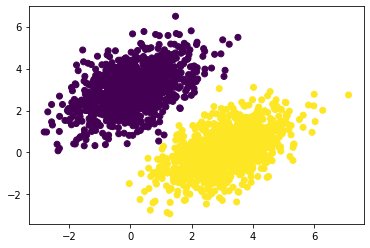

In [57]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

Recall that the prediction value for a given point `[x, y]` is simply `prediction == [[w1], [w2]] • [x, y] + b == w1 * x + w2 * y + b`. Thus, `class 0` is defined as `w1 * x + w2 * y + b < 0.5`, and `class 1` is defined as `w1 * x + w2 * y + b > 0.5`. 

You’ll notice that what you’re looking at is really the equation of a line in the 2D plane: `w1 * x + w2 * y + b = 0.5`. Above the line is `class 1`, and below the line is `class 0`. 

You may be used to seeing line equations in the format `y = a * x + b`; in the same format, our line becomes `y = - w1 / w2 * x + (0.5 - b) / w2`.

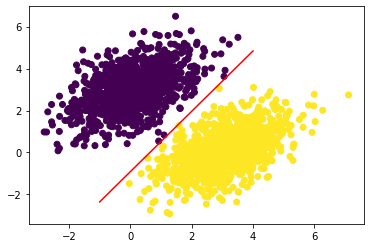

In [58]:
# generate 100 regularly spaced numbers between –1 and 4
x = np.linspace(-1, 4, 100)
# line's equation
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
# Plot our line ("-r" means “plot it as a red line”)
plt.plot(x, y, "-r")
# Plot our model’s predictions on the same plot
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)